In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
df=pd.read_csv('UCI_Credit_Card.csv')

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


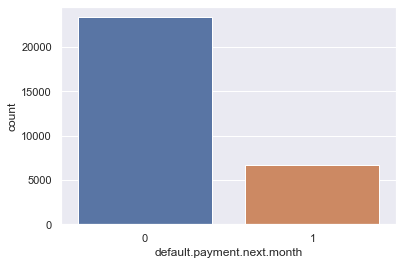

In [11]:
sns.countplot(df['default.payment.next.month'])# data set imbalance

In [12]:
#undersampling of data refernce=http://blog.madhukaraphatak.com/class-imbalance-part-2/

In [74]:
#no_frauds = len(df[df['default.payment.next.month'] == 1])
#non_fraud_indices = df[df['default.payment.next.month'] == 0].index
#random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
#fraud_indices = df[df['default.payment.next.month'] == 1].index
#under_sample_indices = np.concatenate([fraud_indices,random_indices])
#under_sample = df.loc[under_sample_indices]

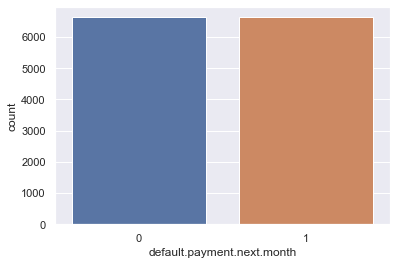

In [75]:
#sns.countplot(under_sample['default.payment.next.month'])

In [76]:
#no_frauds = len(under_sample[under_sample['default.payment.next.month'] == 1])
#print(no_frauds)

6636


In [78]:
X=df.drop(columns=['default.payment.next.month'],axis=1)
Y=df['default.payment.next.month']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [80]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print(X_scaled)

[[-1.73199307 -1.13672015  0.81016074 ... -0.30806256 -0.31413612
  -0.29338206]
 [-1.7318776  -0.3659805   0.81016074 ... -0.24422965 -0.31413612
  -0.18087821]
 [-1.73176213 -0.59720239  0.81016074 ... -0.24422965 -0.24868274
  -0.01212243]
 ...
 [ 1.73176213 -1.05964618 -1.23432296 ... -0.03996431 -0.18322937
  -0.11900109]
 [ 1.7318776  -0.67427636 -1.23432296 ... -0.18512036  3.15253642
  -0.19190359]
 [ 1.73199307 -0.90549825 -1.23432296 ... -0.24422965 -0.24868274
  -0.23713013]]


In [81]:
#reference-https://etav.github.io/python/vif_factor_python.html
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#checking the values
vif

,vif,Features
0,1.014592,ID
1,1.558774,LIMIT_BAL
2,1.024269,SEX
3,1.127753,EDUCATION
4,1.230587,MARRIAGE
5,1.275123,AGE
6,1.921267,PAY_0
7,3.174385,PAY_2
8,3.658900,PAY_3
9,4.293014,PAY_4


In [26]:
X_new=X.drop(['ID','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

In [27]:
X_new

,LIMIT_BAL,SEX,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,0,0,0,0,0,0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,-1,-1,-1,-1,0,0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,4,3,2,-1,0,0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,-1,0,0,0,-1,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [28]:
df_new=df.drop(['ID','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

In [29]:
df_new

,LIMIT_BAL,SEX,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,0,0,0,0,0,0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,-1,-1,-1,-1,0,0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,4,3,2,-1,0,0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,-1,0,0,0,-1,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [30]:
df_new.to_csv('credit_card_new_1.csv')

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   PAY_0                       30000 non-null  int64  
 4   PAY_2                       30000 non-null  int64  
 5   PAY_3                       30000 non-null  int64  
 6   PAY_4                       30000 non-null  int64  
 7   PAY_5                       30000 non-null  int64  
 8   PAY_6                       30000 non-null  int64  
 9   PAY_AMT1                    30000 non-null  float64
 10  PAY_AMT2                    30000 non-null  float64
 11  PAY_AMT3                    30000 non-null  float64
 12  PAY_AMT4                    30000 non-null  float64
 13  PAY_AMT5                    300

C:\Users\Divya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


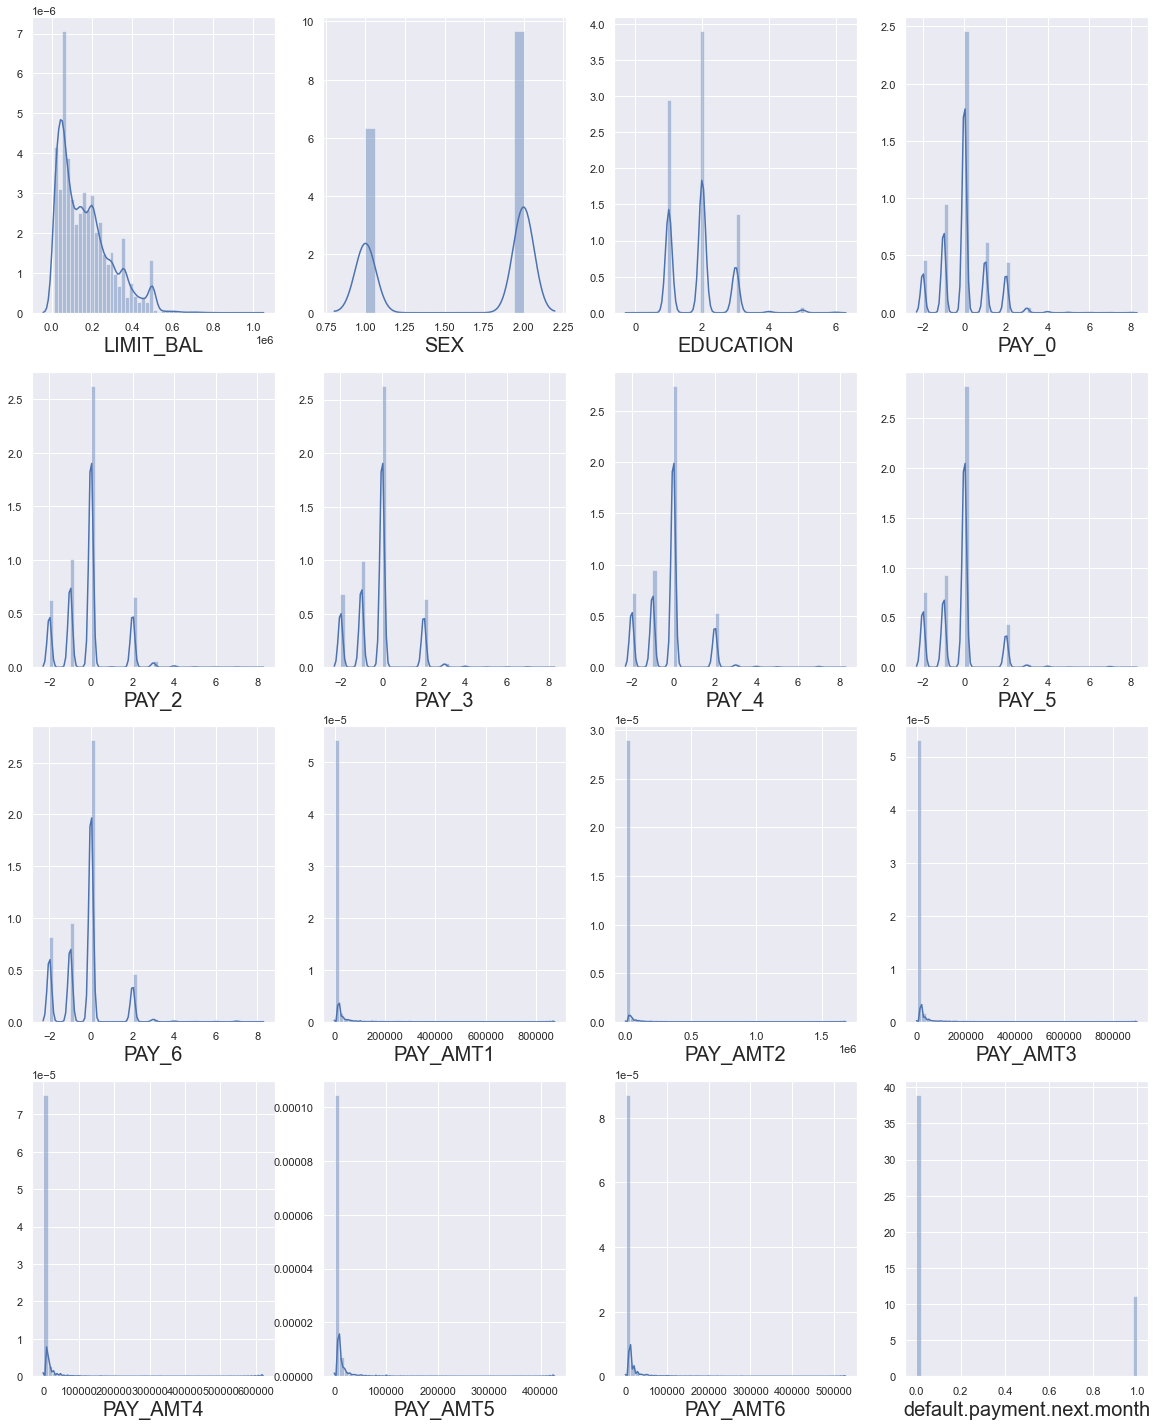

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=16 :     # as there are 16 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

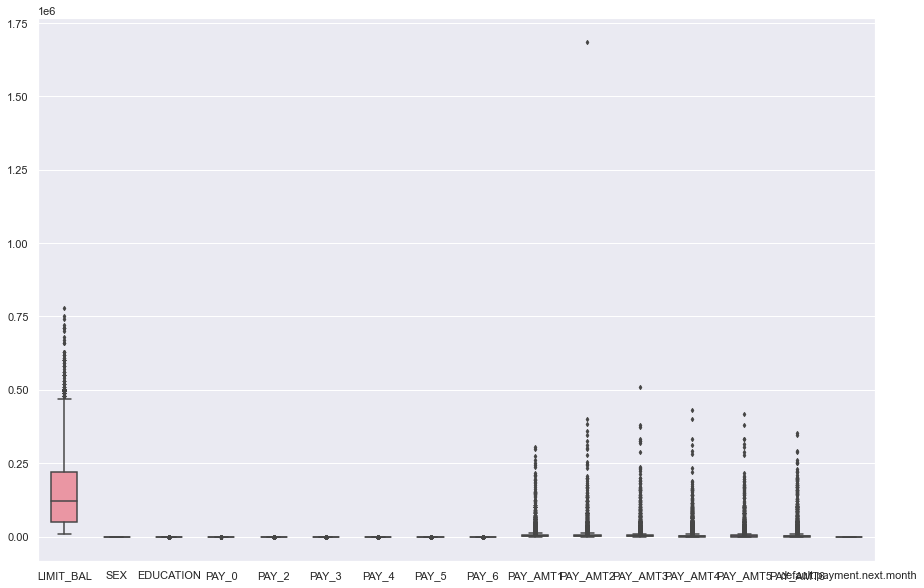

In [127]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_new, width= 0.5,ax=ax,  fliersize=3)